In [1]:
import pandas as pd
import numpy as np
import numpy.random as nr
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.ensemble import RandomForestClassifier
import catboost as cat
from catboost import CatBoostClassifier
from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.metrics import log_loss, confusion_matrix, accuracy_score
import xgboost as xgb
import lightgbm as lgb
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

In [2]:
def fill_missing_values(data):
    
    '''
    Function to input missing values based on the column object type
    '''
    
    cols = list(data.columns)
    for col in cols:
        if data[col].dtype == 'int64' or data[col].dtype == 'float64':
        
            data[col] = data[col].fillna(data[col].mean())
        
        #elif data[col].dtype == 'O' or data[col].dtype == 'object':
        #    data[col] = data[col].fillna(data[col].mode()[0])
            
        else:
            data[col] = data[col].fillna(data[col].mode()[0])
            
    return data

In [34]:
def one_hot_encoding(traindata, *args):
    
    for ii in args:
        traindata = pd.get_dummies(traindata, prefix=[ii], columns=[ii])
        
    return traindata

def drop_columns(traindata, *args):
    
    #labels = np.array(traindata[target])
    
    columns = []
    for _ in args:
        columns.append(_)
        
    traindata = traindata.drop(columns, axis=1)
    #traindata = traindata.drop(target, axis=1)
    #testdata = testdata.drop(columns, axis=1)
        
    return traindata

In [33]:
def process(traindata):
    
    cols = list(traindata.columns)
    for _ in cols:
        traindata[_] = np.where(traindata[_] == np.inf, 0, traindata[_])
        traindata[_] = np.where(traindata[_] == np.nan, 0, traindata[_])
        traindata[_] = np.where(traindata[_] == -np.inf, 0, traindata[_])
        
    return traindata

In [5]:
def freq_encode(data, cols):
    for i in cols:
        encoding = data.groupby(i).size()
        encoding = encoding/len(data)
        data[i + '_enc'] = data[i].map(encoding)
    return data

In [6]:
def mean_target(data, cols):
    kf = KFold(5)
    a = pd.DataFrame()
    for tr_ind, val_ind in kf.split(data):
        X_tr, X_val= data.iloc[tr_ind].copy(), data.iloc[val_ind].copy()
        for col in cols:
            means = X_val[col].map(X_tr.groupby(col).FORCE_2020_LITHOFACIES_LITHOLOGY.mean())
            X_val[col + '_mean_target'] = means + 0.0001
        a = pd.concat((a, X_val))
    prior = FORCE_2020_LITHOFACIES_LITHOLOGY.mean()
    a.fillna(prior, inplace=True)
    return a

In [19]:
#importing files
train = pd.read_csv('Train.csv', sep=';')
test = pd.read_csv('Test.csv', sep=';')

ntrain = train.shape[0]
ntest = test.shape[0]
target = train.FORCE_2020_LITHOFACIES_LITHOLOGY.copy()
df = pd.concat((train, test)).reset_index(drop=True)

In [8]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 65000.0, int(0), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 30000.0, int(1), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 65030.0, int(2), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 70000.0, int(3), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 80000.0, int(4), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 99000.0, int(5), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 70032.0, int(6), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 88000.0, int(7), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 90000.0, int(8), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 74000.0, int(9), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 86000.0, int(10), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = np.where(df['FORCE_2020_LITHOFACIES_LITHOLOGY'] == 93000.0, int(11), df['FORCE_2020_LITHOFACIES_LITHOLOGY'])

In [20]:
lithology = train['FORCE_2020_LITHOFACIES_LITHOLOGY']

In [21]:
lithology_numbers = {30000: 0,
                 65030: 1,
                 65000: 2,
                 80000: 3,
                 74000: 4,
                 70000: 5,
                 70032: 6,
                 88000: 7,
                 86000: 8,
                 99000: 9,
                 90000: 10,
                 93000: 11}

lithology = lithology.map(lithology_numbers)
lithology

0          2
1          2
2          2
3          2
4          2
          ..
1170506    0
1170507    1
1170508    1
1170509    1
1170510    1
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, Length: 1170511, dtype: int64

In [31]:
df1 = df.copy()
cols = ['WELL', 'FORCE_2020_LITHOFACIES_LITHOLOGY', 'FORCE_2020_LITHOFACIES_CONFIDENCE']
df1 = drop_columns(df1, *cols)

In [35]:
df1.shape, df.shape
df = df1.copy()

In [37]:
one_hot_cols = ['GROUP']

df = one_hot_encoding(df, *one_hot_cols)

In [38]:
df.shape, test1.shape, train.shape, test.shape

((1307297, 39), (136786, 37), (1170511, 29), (136786, 27))

In [42]:
i = 0
for _ in test.WELL.unique():
    if not _ in train.WELL.unique():
        print('Yes')
        i+=1
    if i == 10:
        print(f'Wells are all found in train data')

Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Yes
Wells are all found in train data


In [68]:
df = freq_encode(df, ['FORMATION'])
data = df.copy()

In [43]:
len(train.FORMATION.unique()), len(test.FORMATION.unique()),

(70, 42)

In [48]:
i = 0
for _ in train.FORMATION.unique():
    if _ in test.FORMATION.unique():
        #print('Yes')
        i+=1
    
print(f' There are {len(train.FORMATION.unique())} formations in the train data')
print(f' There are {len(test.FORMATION.unique())} formations in the test data')
print(f' {i} FORMATIONS are found in train data')

 There are 70 formations in the train data
 There are 42 formations in the test data
 41 FORMATIONS are found in train data


In [63]:
df.shape

(1307297, 34)

In [62]:
cols = ['SGR', 'DTS', 'DCAL', 'MUDWEIGHT', 'RMIC', 'ROPA', 'RXO']
#df = drop_columns(df, *cols)

In [60]:
df['FORCE_2020_LITHOFACIES_LITHOLOGY'] = lithology
df = mean_target(df, ['FORMATION'])
df.shape

(1307297, 34)

In [66]:
df.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,GROUP_NORDLAND GP.,GROUP_ROGALAND GP.,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,FORCE_2020_LITHOFACIES_LITHOLOGY,FORMATION_mean_target
count,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,...,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06,1.307297e+06
mean,2.217261e+03,4.802591e+05,6.629230e+06,-1.639199e+03,4.403643e+03,2.994231e+04,1.863252e+03,5.298606e+02,8.370971e+03,7.031829e+01,...,9.645475e-02,1.098090e-01,2.135704e-03,2.147270e-01,9.217492e-04,2.202866e-02,1.051154e-01,9.456918e-03,6.424728e+03,7.941105e+03
std,1.006788e+03,5.186093e+04,6.140245e+05,5.841939e+03,1.581715e+04,3.067864e+04,1.051756e+04,5.625955e+03,2.106338e+04,3.396652e+01,...,2.952140e-01,3.126517e-01,4.616432e-02,4.106330e-01,3.034634e-02,1.467767e-01,3.067021e-01,9.678580e-02,1.878840e+04,2.059870e+04
min,1.360860e+02,6.138598e+04,6.138598e+04,-5.395563e+03,2.344000e+00,1.000000e-04,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.556392e-02
25%,1.443348e+03,4.544695e+05,6.590892e+06,-2.843063e+03,9.826920e+00,1.366874e+00,9.295638e-01,9.138728e-01,2.125424e+00,4.722087e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.605231e+00
50%,2.113328e+03,4.767682e+05,6.737676e+06,-2.068498e+03,1.266394e+01,2.292279e+01,1.511353e+00,1.470773e+00,2.384522e+00,6.731985e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,1.894193e+00
75%,2.907089e+03,5.183656e+05,6.784906e+06,-1.399016e+03,1.753654e+01,6.138598e+04,3.038132e+00,2.640119e+00,2.571216e+00,8.853503e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+00,2.417052e+00
max,5.436632e+03,5.726328e+05,6.856661e+06,6.138598e+04,6.138598e+04,6.138598e+04,6.138598e+04,6.138598e+04,6.138598e+04,1.076964e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.138598e+04,6.138598e+04


In [65]:
df.isna().sum()

DEPTH_MD                            0
X_LOC                               0
Y_LOC                               0
Z_LOC                               0
FORMATION                           0
CALI                                0
RSHA                                0
RMED                                0
RDEP                                0
RHOB                                0
GR                                  0
NPHI                                0
PEF                                 0
DTC                                 0
SP                                  0
BS                                  0
ROP                                 0
DRHO                                0
GROUP_BAAT GP.                      0
GROUP_BOKNFJORD GP.                 0
GROUP_CROMER KNOLL GP.              0
GROUP_DUNLIN GP.                    0
GROUP_HEGRE GP.                     0
GROUP_HORDALAND GP.                 0
GROUP_NORDLAND GP.                  0
GROUP_ROGALAND GP.                  0
GROUP_ROTLIE

In [70]:
train2 = data[:ntrain].copy()
target = train2.FORCE_2020_LITHOFACIES_LITHOLOGY.copy()
train2.drop(['FORCE_2020_LITHOFACIES_CONFIDENCE',
             'FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1, inplace=True)

test2 = data[ntrain:].copy()
test2.drop(['FORCE_2020_LITHOFACIES_CONFIDENCE',
            'FORCE_2020_LITHOFACIES_LITHOLOGY'], axis=1, inplace=True)
test2 = test2.reset_index(drop=True)

In [73]:
train.shape, test.shape, df.shape, data.shape, train2.shape, test2.shape, traindata.shape, testdata.shape

((1170511, 29),
 (136786, 27),
 (1307297, 44),
 (1307297, 46),
 (1170511, 44),
 (136786, 44),
 (1170511, 42),
 (136786, 42))

In [71]:
traindata = train2.copy().drop(['WELL', 'FORMATION'], axis=1)
testdata = test2.copy().drop(['WELL', 'FORMATION'], axis=1)

In [78]:
traindata = pd.DataFrame(traindata, columns=(list(train2.drop(['WELL', 'FORMATION'], axis=1).columns)))
testdata = pd.DataFrame(testdata, columns=(list(train2.drop(['WELL', 'FORMATION'], axis=1).columns)))

In [75]:
traindata.describe()

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,FORMATION_enc,WELL_enc,FORMATION_mean_target,WELL_mean_target
count,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,...,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06,1.170511e+06
mean,2.184087e+03,4.817257e+05,6.620337e+06,-1.553760e+03,4.620794e+03,2.831809e+04,2.049760e+03,5.882582e+02,8.459520e+03,7.091370e+01,...,2.385283e-03,1.999366e-01,1.029465e-03,2.231162e-02,1.127704e-01,1.045526e-02,7.184524e+03,1.200089e-02,8.368590e+03,5.755907e+04
std,9.971821e+02,5.314812e+04,6.449539e+05,6.143222e+03,1.617257e+04,3.059529e+04,1.101508e+04,5.926859e+03,2.115684e+04,3.423149e+01,...,4.878110e-02,3.999526e-01,3.206877e-02,1.476951e-01,3.163121e-01,1.017151e-01,1.973345e+04,4.466114e-03,2.106262e+04,1.484155e+04
min,1.360860e+02,6.138598e+04,6.138598e+04,-5.395563e+03,2.344000e+00,1.000000e-04,-8.418695e-03,3.170056e-02,7.209712e-01,1.092843e-01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.031840e-05,1.326401e-03,1.000000e-04,1.991244e-01
25%,1.418597e+03,4.544695e+05,6.590854e+06,-2.804552e+03,9.882808e+00,1.296196e+00,9.290146e-01,9.148633e-01,2.123109e+00,4.762722e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.948601e-02,9.418671e-03,4.332071e-01,6.138598e+04
50%,2.076605e+03,4.768917e+05,6.732132e+06,-2.030516e+03,1.272100e+01,1.039210e+01,1.489834e+00,1.449790e+00,2.380012e+00,6.836763e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.865227e-02,1.211660e-02,7.628467e-01,6.138598e+04
75%,2.864393e+03,5.201314e+05,6.784877e+06,-1.373344e+03,1.765025e+01,6.138598e+04,3.025846e+00,2.615708e+00,2.570078e+00,8.903551e+01,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.488759e-01,1.592829e-02,1.467566e+00,6.138598e+04
max,5.436632e+03,5.726328e+05,6.856661e+06,6.138598e+04,6.138598e+04,6.138598e+04,6.138598e+04,6.138598e+04,6.138598e+04,1.076964e+03,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,6.138598e+04,1.922363e-02,6.138598e+04,6.138598e+04


In [76]:
#using StandardScaler function to scale the numeric features 

scaler = preprocessing.StandardScaler().fit(traindata)
traindata = scaler.transform(traindata)
traindata

array([[ -1.69433413,  -0.82945064,  -0.23158937, ...,   0.44211047,
          2.51713316,   0.2578506 ],
       [ -1.6941817 ,  -0.82945064,  -0.23158937, ...,   0.44211047,
          2.51713316,   0.2578506 ],
       [ -1.69402927,  -0.82945064,  -0.23158937, ...,   0.44211047,
          2.51713316,   0.2578506 ],
       ...,
       [  0.98831484,  -7.90883794, -10.16964728, ...,  -2.33769654,
         -0.39725368,   0.2578506 ],
       [  0.98846727,  -7.90883794, -10.16964728, ...,  -2.33769654,
         -0.39725368,   0.2578506 ],
       [  0.9886197 ,  -7.90883794, -10.16964728, ...,  -2.33769654,
         -0.39725368,   0.2578506 ]])

In [77]:
testdata = scaler.transform(testdata)
testdata

array([[-1.70827341, -1.10034402, -0.24571442, ...,  0.7865462 ,
         2.51713316,  0.2578506 ],
       [-1.70812098, -1.10034402, -0.24571442, ...,  0.7865462 ,
         2.51713316,  0.2578506 ],
       [-1.70796855, -1.10034402, -0.24571442, ...,  0.7865462 ,
         2.51713316,  0.2578506 ],
       ...,
       [ 1.0435477 ,  1.025441  ,  0.27062968, ..., -1.95506629,
        -0.39725877,  0.2578506 ],
       [ 1.04370013,  1.025441  ,  0.27062968, ..., -1.95506629,
        -0.39725877,  0.2578506 ],
       [ 1.04385256,  1.025441  ,  0.27062968, ..., -1.95506629,
        -0.39725877,  0.2578506 ]])

In [79]:
x_train, x_test, y_train, y_test = ms.train_test_split(traindata, target, test_size=0.2,
                                                       random_state=42)

In [80]:
x_test

,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,CALI,RSHA,RMED,RDEP,RHOB,GR,...,GROUP_ROTLIEGENDES GP.,GROUP_SHETLAND GP.,GROUP_TYNE GP.,GROUP_VESTLAND GP.,GROUP_VIKING GP.,GROUP_ZECHSTEIN GP.,FORMATION_enc,WELL_enc,FORMATION_mean_target,WELL_mean_target
30423,0.159667,-0.845171,-0.243934,-0.124405,-0.284798,-0.925545,-0.186017,-0.099141,-0.399744,-0.119958,...,-0.048898,-0.499901,-0.032102,-0.151066,-0.356516,-0.10279,-0.364076,0.347395,-0.397296,0.257851
1073159,1.402333,1.170203,0.366409,-0.313207,-0.285184,1.080816,-0.185578,-0.098411,-0.399723,0.654003,...,-0.048898,-0.499901,-0.032102,-0.151066,-0.356516,-0.10279,-0.364078,-1.815819,-0.397224,0.257851
436368,-1.453369,0.034237,-0.046552,0.137387,3.509968,1.080816,5.386817,-0.099084,2.501625,-0.437996,...,-0.048898,-0.499901,-0.032102,-0.151066,-0.356516,-0.10279,-0.364071,0.009296,-0.397300,0.257851
290688,-1.111251,0.104718,0.036604,0.081362,-0.284627,1.080816,-0.186008,-0.099045,-0.399752,-0.850633,...,-0.048898,-0.499901,-0.032102,-0.151066,-0.356516,-0.10279,2.746680,0.941551,2.517133,0.257851
1118085,1.399920,1.056897,0.264834,-0.246682,-0.285188,1.080816,-0.185394,-0.097892,-0.399727,1.633201,...,-0.048898,-0.499901,-0.032102,-0.151066,-0.356516,-0.10279,-0.364078,-1.948387,-0.397259,0.257851
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636638,-0.715855,1.044643,0.215251,0.020120,-0.285195,-0.925463,-0.185756,-0.098653,-0.399740,-0.333046,...,-0.048898,2.000396,-0.032102,-0.151066,-0.356516,-0.10279,-0.364078,-1.766149,-0.397186,0.257851
999368,-1.440882,0.730664,0.243452,0.135194,3.509968,1.080816,-0.185896,-0.098948,2.501625,4.117704,...,-0.048898,-0.499901,-0.032102,-0.151066,-0.356516,-0.10279,2.746680,0.586325,2.517133,0.257851
904670,-0.107536,-0.628998,0.298465,-0.080911,-0.284921,-0.925514,-0.185962,-0.099025,-0.399738,0.816129,...,-0.048898,2.000396,-0.032102,-0.151066,-0.356516,-0.10279,-0.364077,-0.433623,-0.397275,0.257851
428567,-0.401066,-0.109691,-0.042190,-0.033434,-0.284921,-0.925554,-0.186042,-0.099184,2.501625,-0.138588,...,-0.048898,-0.499901,-0.032102,-0.151066,-0.356516,-0.10279,-0.364077,-1.145788,-0.397312,0.257851


In [ ]:
model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', verbose=2)
model.fit(x_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


building tree 1 of 50


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.7s remaining:    0.0s


building tree 2 of 50
building tree 3 of 50


In [20]:
A = np.load('penalty_matrix.npy')
A

array([[0.   , 2.   , 3.5  , 3.   , 3.75 , 3.5  , 3.5  , 4.   , 4.   ,
        2.5  , 3.875, 3.25 ],
       [2.   , 0.   , 2.375, 2.75 , 4.   , 3.75 , 3.75 , 3.875, 4.   ,
        3.   , 3.75 , 3.   ],
       [3.5  , 2.375, 0.   , 2.   , 3.5  , 3.5  , 3.75 , 4.   , 4.   ,
        2.75 , 3.25 , 3.   ],
       [3.   , 2.75 , 2.   , 0.   , 2.5  , 2.   , 2.25 , 4.   , 4.   ,
        3.375, 3.75 , 3.25 ],
       [3.75 , 4.   , 3.5  , 2.5  , 0.   , 2.625, 2.875, 3.75 , 3.25 ,
        3.   , 4.   , 3.625],
       [3.5  , 3.75 , 3.5  , 2.   , 2.625, 0.   , 1.375, 4.   , 3.75 ,
        3.5  , 4.   , 3.625],
       [3.5  , 3.75 , 3.75 , 2.25 , 2.875, 1.375, 0.   , 4.   , 3.75 ,
        3.125, 4.   , 3.75 ],
       [4.   , 3.875, 4.   , 4.   , 3.75 , 4.   , 4.   , 0.   , 2.75 ,
        3.75 , 3.75 , 4.   ],
       [4.   , 4.   , 4.   , 4.   , 3.25 , 3.75 , 3.75 , 2.75 , 0.   ,
        4.   , 4.   , 3.875],
       [2.5  , 3.   , 2.75 , 3.375, 3.   , 3.5  , 3.125, 3.75 , 4.   ,
        0.   , 2.5  

In [21]:
def score(y_true, y_pred):
    S = 0.0
    y_true = y_true.astype(int)
    y_pred = y_pred.astype(int)
    for i in range(0, y_true.shape[0]):
        S -= A[y_true[i], y_pred[i]]
    return S/y_true.shape[0]

In [41]:
pred1 = model.predict(x_test)
#pred[:50]

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   12.0s finished


In [42]:
score(y_test.values, pred1)

-0.10478774300201193

In [151]:
y_test.shape, pred.shape

((234103,), (234103,))

In [123]:
import pickle
pickle.dump(model, open('model.pkl', 'wb'))

In [124]:
pickle.dump(scaler, open('scaler.pkl', 'wb'))

In [25]:
accuracy_score(pred1, y_test)*100

96.3665566011542

In [43]:
rf = model

Text(0, 0.5, 'Feature Importance Score')

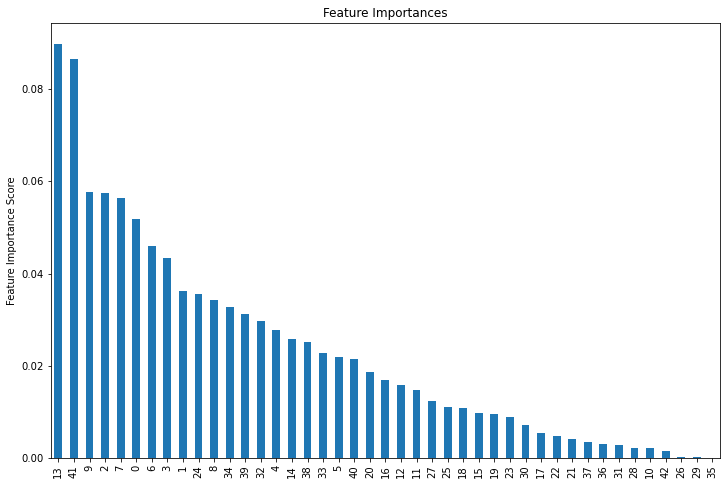

In [44]:
feat_imp = pd.Series(rf.feature_importances_).sort_values(ascending=False)
plt.figure(figsize=(12,8))
feat_imp.plot(kind='bar', title='Feature Importances')
plt.ylabel('Feature Importance Score')

In [48]:
baseline_pred_rf = rf.predict(testdata)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:    3.3s finished


In [63]:
submission = pd.DataFrame(baseline_pred_rf, columns=['Lithology'])

In [62]:
submission.Lithology.value_counts()

0.0     145870
1.0      33816
2.0      29679
3.0      10041
4.0       6605
5.0       3133
6.0       2132
7.0       1684
8.0        665
10.0       235
9.0        224
11.0        19
Name: Lithology, dtype: int64

In [64]:
submission.Lithology.value_counts()

0.0    107252
1.0     17981
3.0      4915
2.0      3833
5.0      2512
8.0       251
7.0        26
4.0        16
Name: Lithology, dtype: int64

In [56]:
submission.to_csv('RF_baseline.csv', index=False)

In [55]:
train1 = train.copy()
df.FORCE_2020_LITHOFACIES_LITHOLOGY.value_counts()

0.0     720803
1.0     168937
2.0     150455
3.0      56320
4.0      33329
5.0      15245
6.0      10513
7.0       8213
8.0       3820
9.0       1688
10.0      1085
11.0       103
Name: FORCE_2020_LITHOFACIES_LITHOLOGY, dtype: int64

In [27]:
train.shape, test.shape

((1170511, 29), (136786, 27))

In [43]:
train_dict = dict(train.isna().sum())
test_dict = dict(test.isna().sum())

def print_columns(data, cutoff):
    cols = list(data.columns)
    data_dict = dict(data.isna().sum())
    
    for i in (data_dict):
        percentage = (data_dict[i]/data.shape[0])*100
        if percentage > cutoff:
            print(f'{i} has {percentage}% of missing values')

In [56]:
print_columns(train, 60)

SGR has 94.07498092713354% of missing values
DTS has 85.08232729124289% of missing values
DCAL has 74.4698682882946% of missing values
MUDWEIGHT has 72.9903435337216% of missing values
RMIC has 84.95016279214805% of missing values
ROPA has 83.56914202429537% of missing values
RXO has 72.02700359073943% of missing values


In [58]:
#columns to drop except rsha, ROPA to be dropped too

print_columns(test, 60)

RSHA has 71.41739651718744% of missing values
SGR has 100.0% of missing values
DTS has 68.40319915780854% of missing values
DCAL has 90.11960288333601% of missing values
MUDWEIGHT has 85.18196306639568% of missing values
RMIC has 91.72722354626936% of missing values
RXO has 78.17905341189888% of missing values


KeyboardInterrupt: 

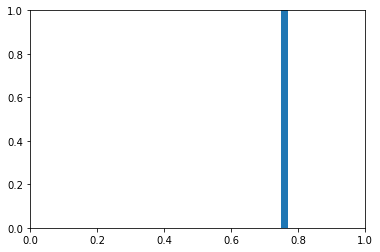

In [53]:
train.plot(kind='bar')

In [36]:
dict(train.isna().sum())

(0, 'WELL')

In [59]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1170511 entries, 0 to 1170510
Data columns (total 29 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   WELL                               1170511 non-null  object 
 1   DEPTH_MD                           1170511 non-null  float64
 2   X_LOC                              1159736 non-null  float64
 3   Y_LOC                              1159736 non-null  float64
 4   Z_LOC                              1159736 non-null  float64
 5   GROUP                              1169233 non-null  object 
 6   FORMATION                          1033517 non-null  object 
 7   CALI                               1082634 non-null  float64
 8   RSHA                               630650 non-null   float64
 9   RMED                               1131518 non-null  float64
 10  RDEP                               1159496 non-null  float64
 11  RHOB                    

In [60]:
train

,WELL,DEPTH_MD,X_LOC,Y_LOC,Z_LOC,GROUP,FORMATION,CALI,RSHA,RMED,...,ROP,DTS,DCAL,DRHO,MUDWEIGHT,RMIC,ROPA,RXO,FORCE_2020_LITHOFACIES_LITHOLOGY,FORCE_2020_LITHOFACIES_CONFIDENCE
0,15/9-13,494.5280,437641.96875,6470972.5,-469.501831,NORDLAND GP.,NaN,19.480835,NaN,1.611410,...,34.636410,NaN,NaN,-0.574928,NaN,NaN,NaN,NaN,65000,1.0
1,15/9-13,494.6800,437641.96875,6470972.5,-469.653809,NORDLAND GP.,NaN,19.468800,NaN,1.618070,...,34.636410,NaN,NaN,-0.570188,NaN,NaN,NaN,NaN,65000,1.0
2,15/9-13,494.8320,437641.96875,6470972.5,-469.805786,NORDLAND GP.,NaN,19.468800,NaN,1.626459,...,34.779556,NaN,NaN,-0.574245,NaN,NaN,NaN,NaN,65000,1.0
3,15/9-13,494.9840,437641.96875,6470972.5,-469.957794,NORDLAND GP.,NaN,19.459282,NaN,1.621594,...,39.965164,NaN,NaN,-0.586315,NaN,NaN,NaN,NaN,65000,1.0
4,15/9-13,495.1360,437641.96875,6470972.5,-470.109772,NORDLAND GP.,NaN,19.453100,NaN,1.602679,...,57.483765,NaN,NaN,-0.597914,NaN,NaN,NaN,NaN,65000,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1170506,7/1-2 S,3169.3124,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.423170,NaN,NaN,...,27.674368,NaN,NaN,-0.001763,NaN,NaN,26.673708,NaN,30000,2.0
1170507,7/1-2 S,3169.4644,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.379244,NaN,NaN,...,28.024338,NaN,NaN,-0.007600,NaN,NaN,26.840818,NaN,65030,2.0
1170508,7/1-2 S,3169.6164,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.350248,NaN,NaN,...,28.091282,NaN,NaN,-0.018297,NaN,NaN,27.007942,NaN,65030,2.0
1170509,7/1-2 S,3169.7684,NaN,NaN,NaN,VESTLAND GP.,Bryne Fm.,8.313779,NaN,NaN,...,28.019775,NaN,NaN,-0.011438,NaN,NaN,27.175179,NaN,65030,2.0


In [63]:
i = list(dict(train.FORMATION.value_counts()).keys())


In [62]:
test.FORMATION.value_counts()

Kyrre Fm.                 27258
Utsira Fm.                21989
Grid Fm.                   8144
Tryggvason Fm.             7917
Statfjord Fm.              4960
Lista Fm.                  4716
Skade Fm.                  4547
Amundsen Fm.               3952
Ness Fm.                   3665
Heather Fm.                3586
Jorsalfare Fm.             3502
Drake Fm.                  2913
Cook Fm.                   2834
Svarte Fm.                 2564
Skagerrak Fm.              2487
Aasgard Fm.                2458
Agat Fm.                   2448
Heimdal Fm.                2118
Burton Fm.                 1826
Balder Fm.                 1721
Rannoch Fm.                1310
Ty Fm.                     1250
Sele Fm.                   1132
Tor Fm.                    1079
Smith Bank Fm.             1056
Hod Fm.                     993
Roedby Fm.                  942
Intra Heather Fm. Sst.      888
Sleipner Fm.                843
Etive Fm.                   670
Tarbert Fm.                 637
Vaale Fm